**Name** -  Yoginder Singh

**School of Business, St Lawrence College**

**ADMN5006: Financial Analytics**

**Assignment: ML Assignment 1**

 



# Business Problem

**Bankcruptcy**

In [1]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import KernelPCA, PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
%matplotlib inline

# Exploratory Data Analysis


**Importing the data**


In [2]:
df = pd.read_excel("C:/Users/yogin/OneDrive/Documents/SLC/SEM-3/FINANCIAL ANALYTICS/ML assignment/Bankruptcy_data(1)(1).xlsx")

In [3]:
#full summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


**Checking if data balanced**

In [4]:
# Balance of the 'Bankruptcy' column
print(df['BK'].value_counts())

0    92314
1      558
Name: BK, dtype: int64


The output indicates that in dataset, there are 92,314 instances where the 'Bankruptcy' (BK) column is marked as 0 (indicating no bankruptcy) and 558 instances where it is marked as 1 (indicating bankruptcy). 
This shows a significant imbalance in the data: a large majority of the entries are for non-bankrupt cases. In such scenarios, this imbalance could impact the performance of machine learning models, as they might become biased towards predicting the majority class. We might need to consider techniques like oversampling the minority class or undersampling the majority class to balance the data before further analysis or modeling.

**Descriptive Statistics**

In [5]:
#Descriptive statistics for each feature
print(df.describe().T)


                      count        mean           std           min  \
EPS                 92867.0  -14.461355   2195.467288 -3.840000e+05   
Liquidity           92625.0   -2.631237    121.610921 -2.596852e+04   
Profitability       92625.0  -29.537274    677.230667 -7.968200e+04   
Productivity        92625.0   -1.222870     35.885556 -5.093000e+03   
Leverage Ratio      92846.0    1.345316    253.038093 -7.811000e+03   
Asset Turnover      92625.0    1.053613      2.115945 -3.159000e+01   
Operational Margin  87315.0   -7.915485    214.460079 -3.017570e+04   
Return on Equity    92864.0   -2.112382    352.596902 -8.887514e+04   
Market Book Ratio   92815.0  358.506265  26063.637981 -3.151500e+06   
Assets Growth       86171.0    1.294075     73.769522 -1.000000e+00   
Sales Growth        86171.0    1.900108    177.632638 -2.743103e+01   
Employee Growth     85862.0    0.343322     14.074156 -1.000000e+00   
BK                  92872.0    0.006008      0.077280  0.000000e+00   

     

**Correlation Analysis**

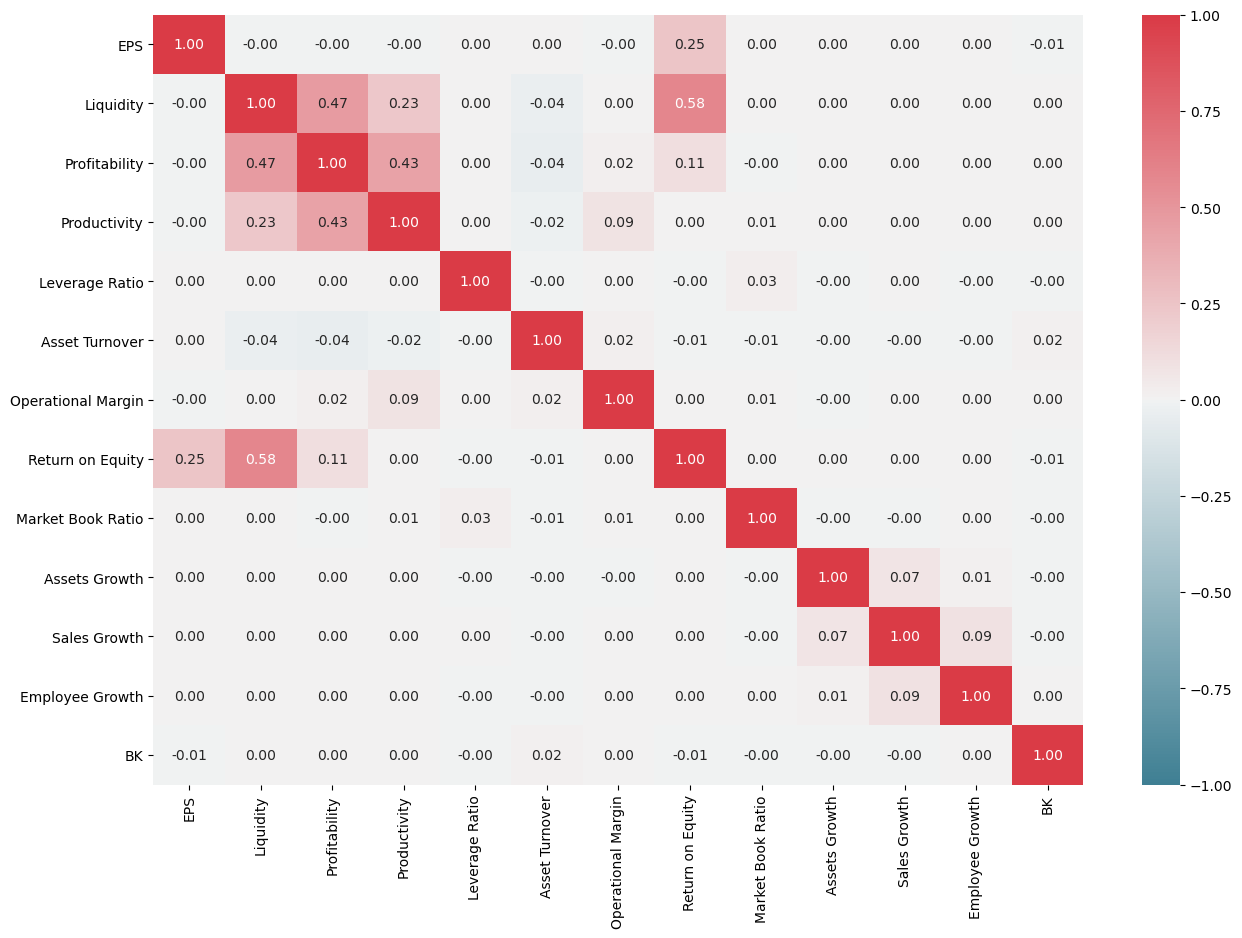

In [6]:
# Calculate correlations
correlation_matrix = df.corr()

# Heatmap of correlation matrix
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.show()
plt.figure(figsize=(15,10))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap,vmin=-1,vmax=1, center=0, fmt='.2f')
plt.show()




Predictors are not too overly correlated with one another. Predictor are low multicollinearity which is good for the model

**Outlier Detection and Handling**

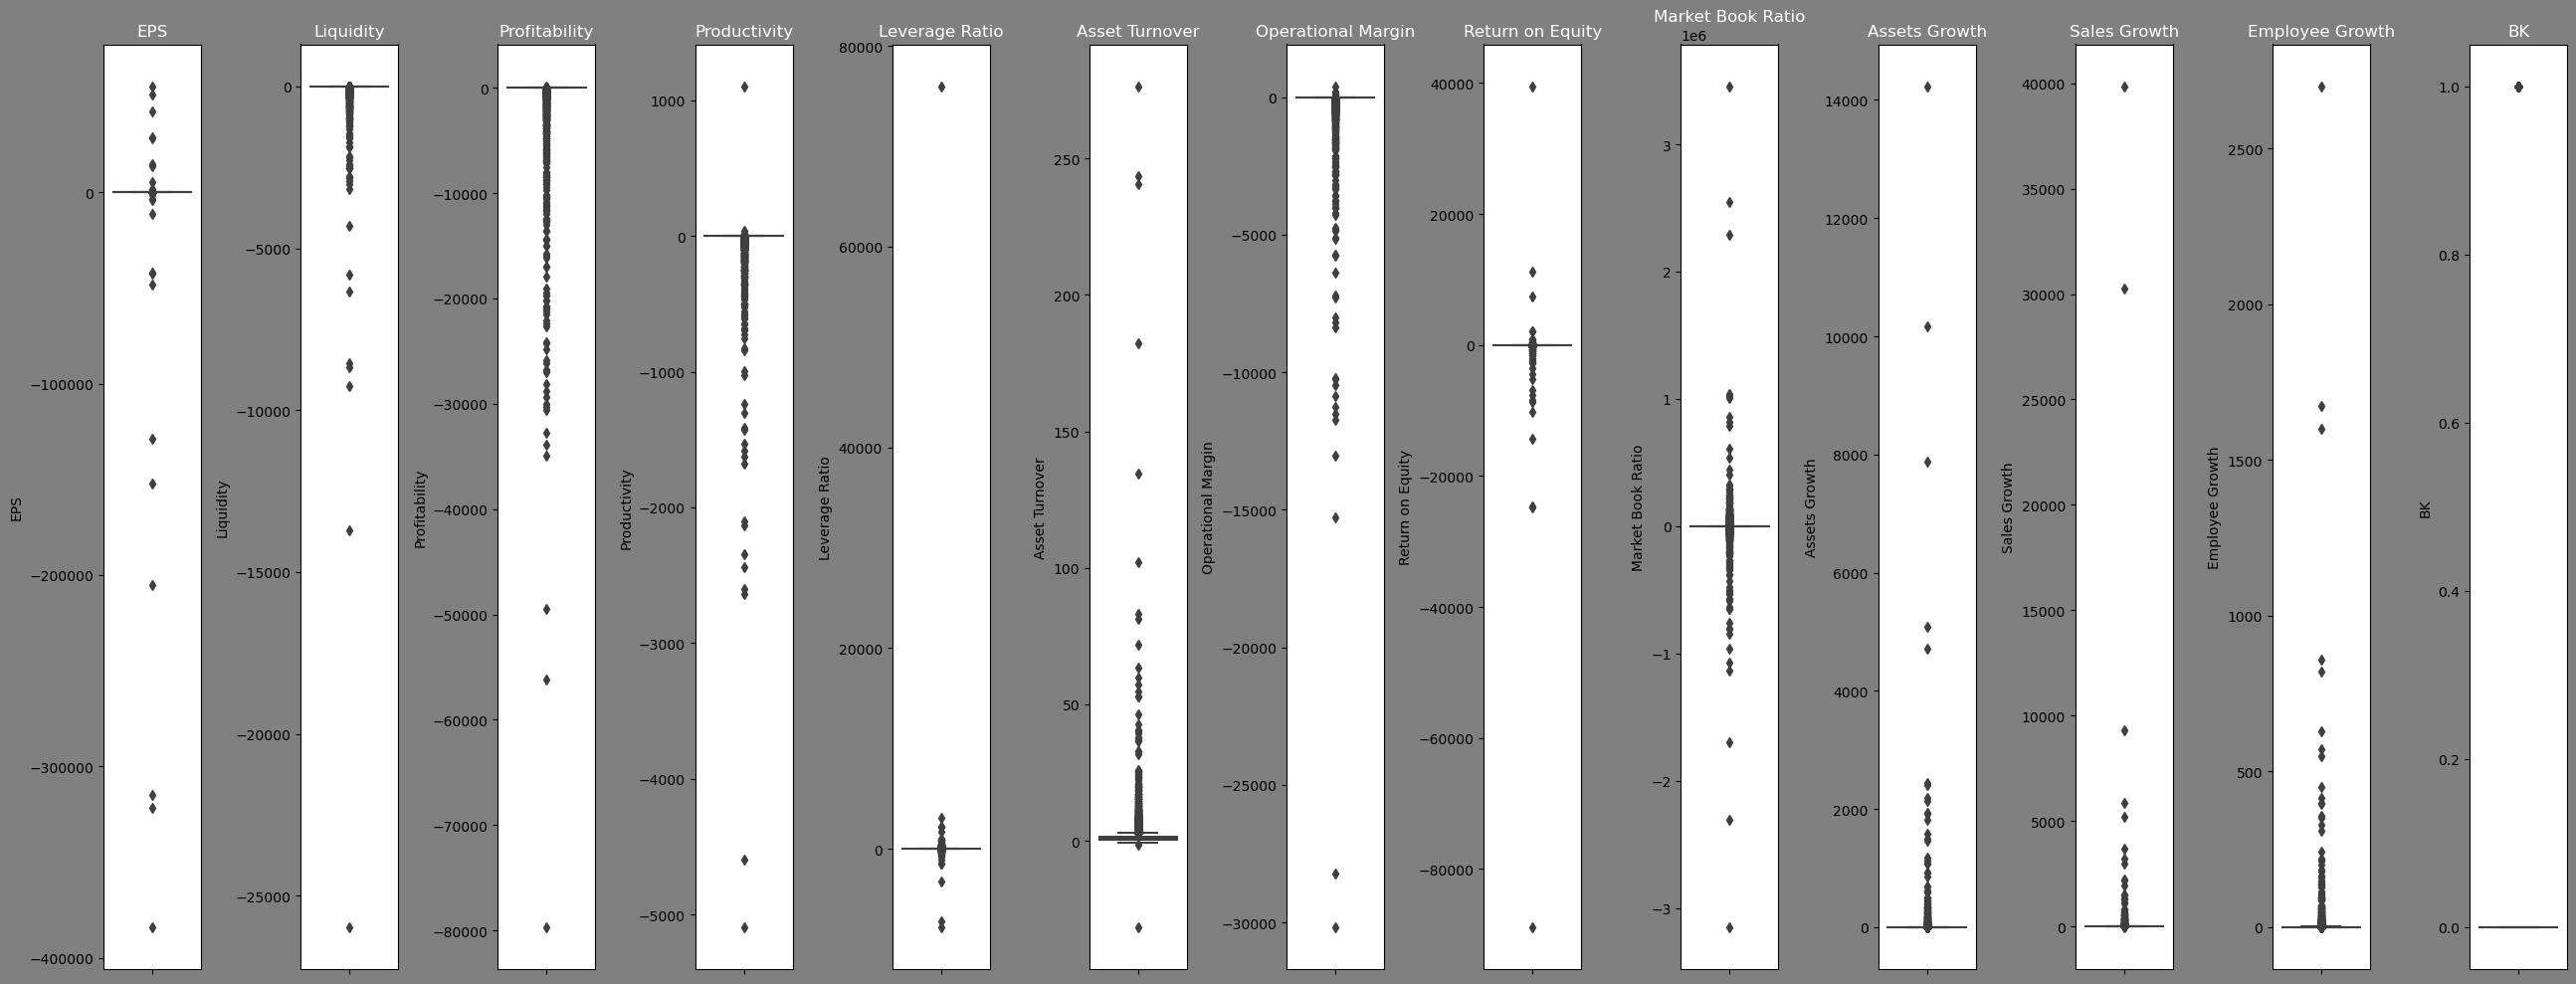

In [7]:
# Outliers

num_columns = df.select_dtypes(include=['float64', 'int64']).columns.size
fig, axes = plt.subplots(ncols=num_columns, figsize=(2 * num_columns, 10), facecolor='gray') 
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(y=df[column], ax=axes[i], showfliers=True, whis=1.5)  # whis=1.5 to define outliers
    axes[i].set_title(column, color='white')  # Set title color to white for visibility against black background

plt.tight_layout()
plt.show()

*Eliminating outliers from our dataset is an option, but it's not ideal. Doing so might lead to losing a significant portion of our data, as we would have to discard the majority of it to accommodate the outliers.*

# Data Processing

In [8]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [10]:
missing_values = df.isnull().sum()

In [11]:
missing_values


EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [12]:
# Creating an imputer object with a median filling strategy for numerical columns
imputer = SimpleImputer(strategy='median')


In [13]:
# Define which columns are numerical (replace with your actual numerical columns)
numerical_cols = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover', 'Operational Margin', 'Return on Equity','Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']



In [14]:
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [15]:
missing_values_2 = df.isnull().sum()
missing_values_2

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [16]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.051844,0.059733,0.017241,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


It's evident from the above that the median has been used to fill in the missing values in our dataset. The rationale behind selecting the median is its robustness against skewed data. Unlike the mean, which can be heavily influenced by outliers, the median provides a more accurate reflection of the central tendency in a dataset that may not be evenly distributed. This makes it a reliable choice for maintaining the integrity of the dataset while addressing missing values. 

# Model Development

In [ ]:
# Droping the target variable

In [17]:
X = df.drop(columns=['BK'])
y = df["BK"]

In [18]:
# Spliting the data into training and testing


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(array([73853.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   444.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

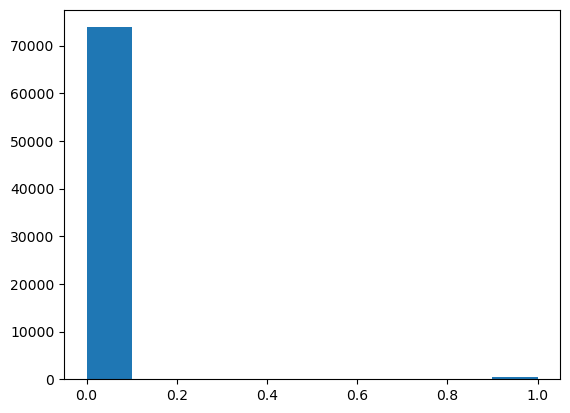

In [20]:
plt.hist(y_train)

**Applying SMOTE**

In [21]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

Other Option for balancing are
1) Oversampling the minority class, 
Package-from imblearn.over_sampling import RandomOverSampler, 
code- ros = RandomOverSampler(random_state=42),
            X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

2) Undersampling the majority class
Package-from imblearn.under_sampling import RandomUnderSampler
code- rus = RandomUnderSampler(random_state=42)
            X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

3) Adaptive Synthetic Sampling
Package- from imblearn.over_sampling import ADASYN, Code = adasyn = ADASYN(random_state=42)

4) Combining Over- and Under-Sampling
Package- from imblearn.combine import SMOTEENN, Code = smote_enn = SMOTEENN(random_state=42)

(array([73853.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 73853.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

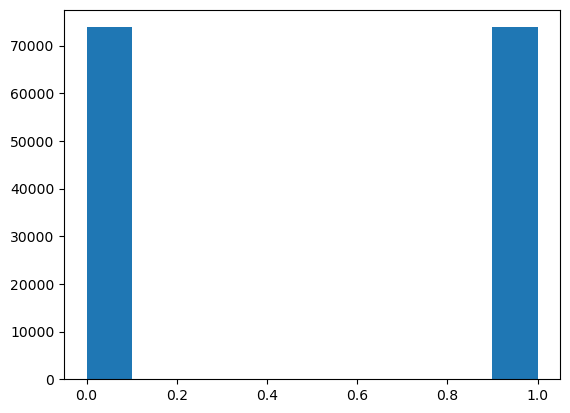

In [22]:
plt.hist(y_train_resampled)

Standardizing features by removing the mean and scaling to unit variance. Standardization of features is a common preprocessing step in machine learning to ensure that different features have the same scale. 

In [23]:
scaler=StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

#Different scaler in sklearn package

#1) StandardScaler-removes the mean and scales the data to unit variance.However influenced by outliers

#2) MinMaxScaler-escales the data set such that all feature values are in the range [0, 1], Influned by Outliers

#3) MaxAbsScaler

#4) RobustScaler- based on percentile,not influenced by a small number of very large marginal outliers. 




**Creating model-LR**

In [24]:
logistic_model = LogisticRegression()

**Training in Logistic regression**

In [25]:
logistic_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

**Testing in Logistic regression**

In [26]:
y_pred_lg= logistic_model.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
consufion_lg = confusion_matrix(y_test, y_pred_lg)

**Result of Logistic Regression**

In [27]:
print("Accuracy:", accuracy_lg)
print("Precision:",precision_lg)
print("recall:", recall_lg)
print("f1_Score:", f1_lg)
print("Confusion Matrix:\n", consufion_lg )

Accuracy: 0.6930820995962315
Precision: 0.010341805433829974
recall: 0.5175438596491229
f1_Score: 0.020278398350232
Confusion Matrix:
 [[12815  5646]
 [   55    59]]


**Creating model-Random Forest**

In [28]:
random_forest_model = RandomForestClassifier()

**Training in Random Forest**

In [30]:
random_forest_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

**Testing in Random Forest**

In [31]:
y_pred_rf= random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
consufion_rf = confusion_matrix(y_test, y_pred_rf)

**Result of Random Forest**

In [32]:
print("Accuracy:", accuracy_rf)
print("Precision:",precision_rf)
print("recall:", recall_rf)
    print("f1_Score:", f1_rf)
print("Confusion Matrix:\n", consufion_rf )

Accuracy: 0.9829878869448183
Precision: 0.12313432835820895
recall: 0.2894736842105263
f1_Score: 0.17277486910994763
Confusion Matrix:
 [[18226   235]
 [   81    33]]


# Hyperparameter tunning

Hyperparameter adjustment in Random Forest

In [33]:
# Define the parameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [34]:
decision_model = RandomForestClassifier()      

In [37]:
grid_search = GridSearchCV(decision_model, param_grid=param_grid, cv=3, n_jobs=-1)


In [38]:
# Fit the grid search to your data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Grid search has found the best hyperparameters for your RandomForestClassifier model based on the cross-validation results.**

***Summary of Findings***


Here's a summary of the key findings from your report on bankruptcy prediction using machine learning models:

1. **Data Imbalance Challenge**: The dataset showed a significant imbalance between non-bankrupt (92,314 cases) and bankrupt cases (558), which posed a risk of model bias towards predicting non-bankrupt outcomes. This could lead to misleading accuracy metrics and practical limitations in financial risk assessment.

2. **Data Preprocessing Techniques**: To address data imbalance, techniques like SMOTE (Synthetic Minority Over-sampling Technique) were employed. For missing values, medians were used instead of means to maintain data integrity, especially in skewed distributions.

3. **Descriptive and Correlation Analysis**: Basic statistical analysis focused on central tendencies and distribution, highlighting the mean, median, and mode of financial indicators. Correlation analysis indicated low multicollinearity among predictors, beneficial for reliable model predictions.

4. **Model Development and Standardization**: Two models were developed: Logistic Regression and RandomForestClassifier. Feature standardization was achieved using StandardScaler to ensure no single feature disproportionately influenced the model due to its scale.

5. **Comparative Model Performance**:
    - Logistic Regression showed a higher recall but suffered from low precision and F1 score, indicating many false positives.
    - RandomForestClassifier outperformed in accuracy (0.98 vs. 0.69) and F1 score (0.17 vs. 0.02), making it a more balanced choice for bankruptcy prediction.

6. **Conclusion and Future Directions**: The RandomForest model was recommended for its accuracy and balanced performance in precision and recall. It was deemed highly suitable for financial risk assessment. Future steps involve exploring advanced machine learning and deep learning techniques for more robust and versatile predictive tools.

